# TP Bayes

## Stephen Cohen 

### 1 : Préliminaires

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.linalg import sqrtm
from numpy.linalg import eig
import scipy
import scipy.io
import math
from numpy.linalg import det

### 2 : Génération d'une variable aléatoire

In [2]:
def gen_gauss(N):
    vect_gauss=2*np.random.randn(N)+3 
    return vect_gauss

def moy(data):
    return data.mean()
def var(data):
    return data.var()


#plt.plot([i for i in range(1,1000)],[moy(gen_gauss(i)) for i in range(1,1000)])
#plt.plot([i for i in range(1,1000)],[var(gen_gauss(i)) for i in range(1,1000)])
#plt.show()

### 3 : Génération de vecteurs aléatoires gaussiens

#### 1)

In [3]:
N=100
m=[4,9]
s=np.array([[1,0],[0,np.sqrt(6)]])

def gauss_rand_partiel(n,m):
    return np.random.randn(2,n)+ np.array([[m[0] for _ in range(n)],[m[1] for _ in range(n)]])

q1 = gauss_rand_partiel(N,m)

print(q1)

[[ 3.18943806  4.20684035  5.82197584  3.79155833  4.13829322  5.59086377
   4.09854668  4.84563483  3.45553774  5.18120839  3.43394037  2.55953054
   4.25636031  4.60896553  4.92496993  4.69166441  3.79410094  4.89240726
   2.67033382  1.84927368  6.40466515  1.48773994  2.67145236  2.74847419
   5.2435185   5.0346393   4.9203364   4.00149542  3.40896365  4.08333686
   4.62685312  5.14278237  5.64937243  5.51097298  5.08677161  3.35446868
   4.98284238  4.38772305  2.50356428  1.92997949  3.96379036  4.19319807
   4.60478938  3.39035052  4.43984415  3.25423365  5.11687093  4.0314673
   4.06511638  5.26841882  4.53762172  5.10742669  4.40291298  4.85070719
   4.7918908   4.3830331   5.59366952  4.77977761  3.58353477  3.6098544
   2.6827288   4.77466142  3.47127106  3.61977131  5.01279813  3.31274923
   3.53418835  3.57459081  2.66427375  4.40473164  2.85330218  3.87113448
   1.62235102  3.3465618   3.52438647  1.8394875   5.55072099  3.65995864
   3.65269487  4.34406585  3.24715086  4

#### 2)

In [4]:
def gauss_rand_full(n,m,s):
    c=np.dot(s,np.random.randn(2,n))+ np.array([[m[0] for _ in range(n)],[m[1] for _ in range(n)]])
    moy=np.mean(c,axis=1)
    print("la moyenne est impirique est de " + str(moy) )
    print("la variance est de " + str(np.cov(c)))
    #print(c)
    return c

q2 = gauss_rand_full(N,m,s)

la moyenne est impirique est de [4.15853229 8.84286832]
la variance est de [[0.71343796 0.381014  ]
 [0.381014   6.38460169]]


#### 3)

En prenant Sigma = R (R transposée) alors U=R convient d'après le cours

#### 4)

On a tg(2*alpha)=2*S_12/(S_11 - S_22) 
d'où alpha = (1/2)*tan^-1(2*S_12/(S_11 - S_22))

In [5]:

s2 = sqrtm((np.array([[2,2],[2,5]])))
m2 =[0,0]

q4 = gauss_rand_full(N,m2,s2)

alpha = (1/2)*math.atan(2*2/(2 - 5))
print("L'orientation de l'ellipsoïde de Mahalanobis est de : " +str(alpha) + " en radian")

V = np.array([[math.cos(alpha), -math.sin(alpha)],[math.sin(alpha), math.cos(alpha)]])
vp = np.linalg.eigvals(np.dot(s2,s2))

s2_ = np.dot(np.dot(V,np.diag([vp[0],vp[1]])),np.transpose(V))

print(s2_)

la moyenne est impirique est de [0.13111133 0.21266918]
la variance est de [[1.86644329 2.02334204]
 [2.02334204 5.37211442]]
L'orientation de l'ellipsoïde de Mahalanobis est de : -0.4636476090008061 en radian
[[2. 2.]
 [2. 5.]]


Ainsi la formule fonctionne bien 

#### 5)

la moyenne est impirique est de [3.92583469 8.70401508]
la variance est de [[1.78601084 1.83790479]
 [1.83790479 4.53651659]]
la moyenne est impirique est de [8.39372045 7.63353176]
la variance est de [[ 2.26394886 -1.95949061]
 [-1.95949061  5.24211079]]
la moyenne est impirique est de [5.89879419 3.55384262]
la variance est de [[ 6.3136584  -2.55121034]
 [-2.55121034  4.71128963]]


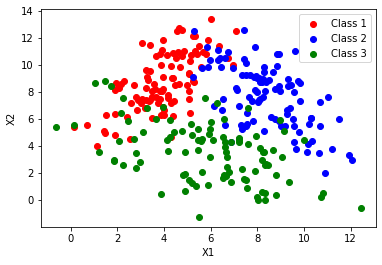

In [6]:
m_1= [4,9]
m_2= [8.5,7.5]
m_3= [6,3.5]

s_1=sqrtm(np.array([[2,2],[2,5]]))
s_2=sqrtm(np.array([[2,-2],[-2,5]]))
s_3=sqrtm(np.array([[7,-4],[-4,7]]))

x1=gauss_rand_full(N,m_1,s_1)
x2=gauss_rand_full(N,m_2,s_2)
x3=gauss_rand_full(N,m_3,s_3)

plt.scatter(x1[0], x1[1], color='red', label='Class 1')
plt.scatter(x2[0], x2[1], color='blue', label='Class 2')
plt.scatter(x3[0], x3[1], color='green', label='Class 3')

plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

### 4 : Courbes d'équidensité

#### 1)

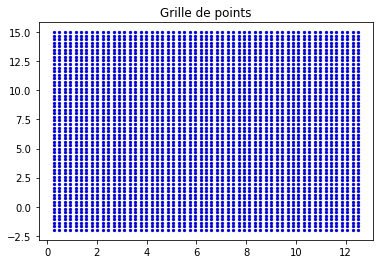

In [7]:
x_i = np.linspace(0.27,12.5, 57)
y_j = np.linspace(-2,15, 57)

X_grid, Y_grid = np.meshgrid(x_i, y_j)

plt.figure()
plt.scatter(X_grid, Y_grid, color='blue', s=5)
plt.title('Grille de points')
plt.show()

#### 2)

In [8]:
m_1 = np.array([4, 9])
s_1 = np.array([[2, 2], [2, 5]])
dens1 = np.zeros((57, 57))
for i in range(57):
    for j in range(57):
        point = np.array([X_grid[i, j], Y_grid[i, j]])
        diff = point - m_1
        exponent = -0.5 * np.dot(np.dot(diff.T, np.linalg.inv(s_1)), diff)
        dens1[i, j] = (1 / (2 * np.pi * np.sqrt(np.linalg.det(s_1)))) * np.exp(exponent)

#print(dens1)

#### 3)

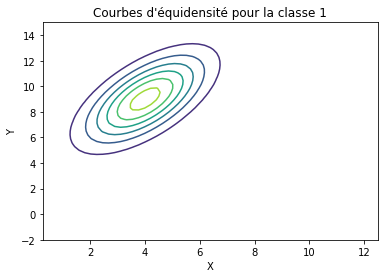

In [9]:
plt.figure()
plt.contour(X_grid, Y_grid, dens1)
plt.title('Courbes d\'équidensité pour la classe 1')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

#### 4)

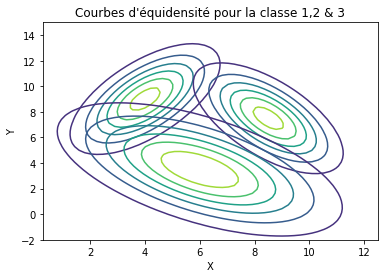

In [10]:
##Pour la classe 2

m_2 = np.array([8.5,7.5])
s_2 = np.array([[2,-2],[-2,5]])
dens2 = np.zeros((57, 57))
for i in range(57):
    for j in range(57):
        point = np.array([X_grid[i, j], Y_grid[i, j]])
        diff = point - m_2
        exponent = -0.5 * np.dot(np.dot(diff.T, np.linalg.inv(s_2)), diff)
        dens2[i, j] = (1 / (2 * np.pi * np.sqrt(np.linalg.det(s_1)))) * np.exp(exponent)

##Pour la classe 3
        
m_3 = np.array([6,3.5])
s_3 = np.array([[7,-4],[-4,7]])
dens3 = np.zeros((57, 57))
for i in range(57):
    for j in range(57):
        point = np.array([X_grid[i, j], Y_grid[i, j]])
        diff = point - m_3
        exponent = -0.5 * np.dot(np.dot(diff.T, np.linalg.inv(s_3)), diff)
        dens3[i, j] = (1 / (2 * np.pi * np.sqrt(np.linalg.det(s_3)))) * np.exp(exponent)

plt.figure()
plt.contour(X_grid, Y_grid, dens1)
plt.contour(X_grid, Y_grid, dens2)
plt.contour(X_grid, Y_grid, dens3)
plt.title('Courbes d\'équidensité pour la classe 1,2 & 3')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

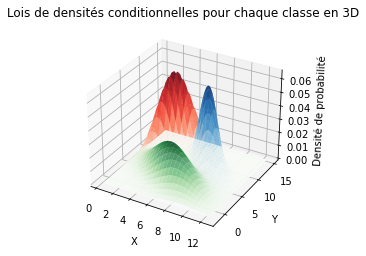

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.plot_surface(X_grid, Y_grid, dens1, cmap='Reds', alpha=0.7, label='Classe 1')
ax.plot_surface(X_grid, Y_grid, dens2, cmap='Blues', alpha=0.7, label='Classe 2')
ax.plot_surface(X_grid, Y_grid, dens3, cmap='Greens', alpha=0.7, label='Classe 3')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Densité de probabilité')
ax.set_title('Lois de densités conditionnelles pour chaque classe en 3D')


plt.show()

On observe que pour chacune des classes, les amplitudes maximales sont d'environ 0,08 et ont lieu sur les points correspondants à la moyenne de chacune des densité. 
C'est bien ce que l'on attend puisque ce sont des lois normales donc la densité est la plus forte au niveau de la moyenne. 
### 5 : Visulalisation des frontières

#### 1)

In [12]:
def classes(d1,d2,d3,n=57):
    z=np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            a = [d1[i,j],d2[i,j],d3[i,j]]
            z[i,j]=a.index(max(a))
            z[i,j]+=1
    return z

print(classes(dens1,dens2,dens3))
            


[[3. 3. 3. ... 3. 3. 3.]
 [3. 3. 3. ... 3. 3. 3.]
 [3. 3. 3. ... 3. 3. 3.]
 ...
 [3. 3. 3. ... 1. 1. 1.]
 [3. 3. 3. ... 1. 1. 1.]
 [3. 3. 3. ... 1. 1. 1.]]


#### 2)

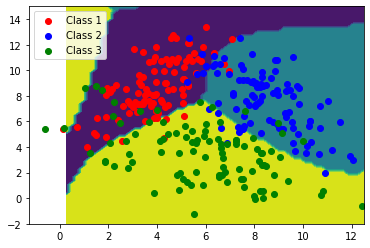

In [13]:
z=classes(dens1,dens2,dens3)

plt.contourf(X_grid,Y_grid,z)
plt.scatter(x1[0], x1[1], color='red', label='Class 1')
plt.scatter(x2[0], x2[1], color='blue', label='Class 2')
plt.scatter(x3[0], x3[1], color='green', label='Class 3')
plt.legend()
plt.show()


En violet, il s'agit de la zone de l'espace liée la classe 1.
En jaune, la classe 3.
En bleu, la classe 2.

#### 6 : Application 

In [14]:
data = scipy.io.loadmat('voitures.mat')
cars = data['cars']


MPG = cars[:, 0]  
weight = cars[:, 4]  
continent = cars[:, -1] 

usa=cars[continent==1]
asie=cars[continent==3]
europe=cars[continent==2]

m_USA = np.mean(usa[:,[0,4]],axis=0)
m_Asie = np.mean(asie[:,[0,4]],axis=0)
m_Europe = np.mean(europe[:,[0,4]],axis=0)

s_USA= np.cov(usa[:,[0,4]].T)
s_Asie= np.cov(asie[:,[0,4]].T)
s_Europe= np.cov(europe[:,[0,4]].T)

print(s_USA)


[[ 4.14785473e+01 -4.33566974e+03]
 [-4.33566974e+03  6.32576357e+05]]


Maintenant on va refaire exactement la même chose que dans les questions précédentes.

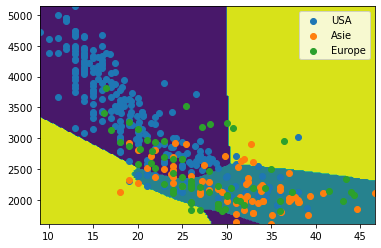

In [15]:
nb_point = 200
mpg_min, mpg_max= np.min(MPG),np.max(MPG)
A=np.linspace(mpg_min, mpg_max, 200)

weight_min, weight_max = np.min(weight), np.max(weight)
B=np.linspace(weight_min,weight_max,200)

A_grid,B_grid = np.meshgrid(A,B)

def densite(n,m,s,a,b):
    sqrt= s
    dens = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            point = np.array([a[i, j], b[i, j]])
            diff = point - m
            exponent = -0.5 * np.dot(np.dot(diff.T, np.linalg.inv(sqrt)), diff)
            dens[i, j] = (1 / (2 * np.pi * np.sqrt(np.linalg.det(sqrt)))) * np.exp(exponent)
    return dens

dens_usa=densite(nb_point,m_USA,s_USA,A_grid,B_grid)*(len(usa)/len(cars))
dens_asie=densite(nb_point,m_Asie,s_Asie,A_grid,B_grid)*(len(asie)/len(cars))
dens_europe=densite(nb_point,m_Europe,s_Europe,A_grid,B_grid)*(len(europe)/len(cars))

z_car=classes(dens_usa,dens_asie,dens_europe,n=nb_point)

plt.contourf(A_grid,B_grid,z_car)
plt.scatter(usa[:,[0,4]][:,0],usa[:,[0,4]][:,1], label='USA')
plt.scatter(asie[:,[0,4]][:,0],asie[:,[0,4]][:,1], label='Asie')
plt.scatter(europe[:,[0,4]][:,0],europe[:,[0,4]][:,1], label='Europe')
plt.legend()
plt.show()


